In [1]:
import  pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("Shoe prices.csv")

## EDA & FEature Engenering

In [3]:
data.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [4]:
data.tail()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00
1005,Nike,Air Max 97,Running,Women,US 7.5,Silver,Leather,$170.00


In [5]:
data.shape

(1006, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [7]:
# Check There is any null values is there
data.isnull().sum()

Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

In [8]:
# Check If There is any duplicet value sis there
data.duplicated().sum()

81

In [9]:
# Drop Duplicet Values
data.drop_duplicates(inplace=True)

In [10]:
# Replace $ sign with no space and USD Doller convert in to indian rupees
data['Price (USD)'] = data['Price (USD)'].apply(lambda x:x.replace("$","")).astype(float)
usd_to_inr_rate = 75.5  # exchange rate as of 3 May 2023
data['Price (USD)'] = round(data['Price (USD)'] * usd_to_inr_rate, 2)
data["Price"] = data['Price (USD)']

In [11]:
data.drop("Price (USD)",axis=1 , inplace=True)

In [12]:
data.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price'],
      dtype='object')

In [13]:
uni = ['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material']
for i in uni:
    print(i,data[i].unique())
    print("="*60)

Brand ['Nike' 'Adidas' 'Reebok' 'Converse' 'Puma' 'Vans' 'New Balance' 'Asics'
 'Fila' 'Skechers']
Model ['Air Jordan 1' 'Ultra Boost 21' 'Classic Leather' 'Chuck Taylor'
 'Future Rider' 'Old Skool' '990v5' 'Gel-Kayano 28' 'Disruptor II'
 'Go Run Razor 3' 'Air Max 270' 'Stan Smith' 'Club C 85' 'One Star'
 'RS-Fast' 'Authentic' 'Fresh Foam 1080v11' 'Gel-Nimbus 23' 'Ray Tracer'
 'Arch Fit' 'Air Force 1' 'NMD_R1' 'Zig Kinetica II' 'Jack Purcell'
 'Calibrate Runner' 'Sk8-Hi' '327' 'Gel-Quantum 180' 'Mindblower'
 "D'Lites" 'Air Max 2090' 'Adizero Adios 5' 'Nano 9' 'Chuck 70'
 'Future Rider Play' 'Slip-On' '574' 'Gel-Kayano 27' 'Venom' 'Go Walk 5'
 'Suede Classic' 'Original Fitness' 'Free RN 5.0' 'Adilette Cloudfoam'
 'Clyde All Pro' 'Era' 'Fresh Foam More v2' 'GT-2000 10' 'Dynamight 2.0'
 'Nano X1' 'Clyde All-Pro' 'Gel-Quantum 360' 'D-Formation'
 'Max Cushioning' 'Air Max 90' 'Yeezy Boost 350' 'Classic Nylon'
 'FuelCell Echo' 'GT-2000 9' 'Elite Flex' 'Blazer Low' 'SK8-Hi'
 'Gel-Lyte III NS'

In [14]:
# def colour(x):
#     if x == "pink":
#         return(12)
#     elif x== "White":
#         return(10)
#     elif x=="Black":
#         return(14)
#     elif x=="Navy":
#         return(16)
#     elif x=="Silver":
#         return(13)
#     else:
#         return(9)
        
#     return x
# data["Color"] = data["Color"].apply(colour)

In [15]:
# data.drop("Model",axis=1,inplace=True)

In [16]:
# Saprate numerical and catiogerical data
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material'], dtype='object')
Index(['Price'], dtype='object')


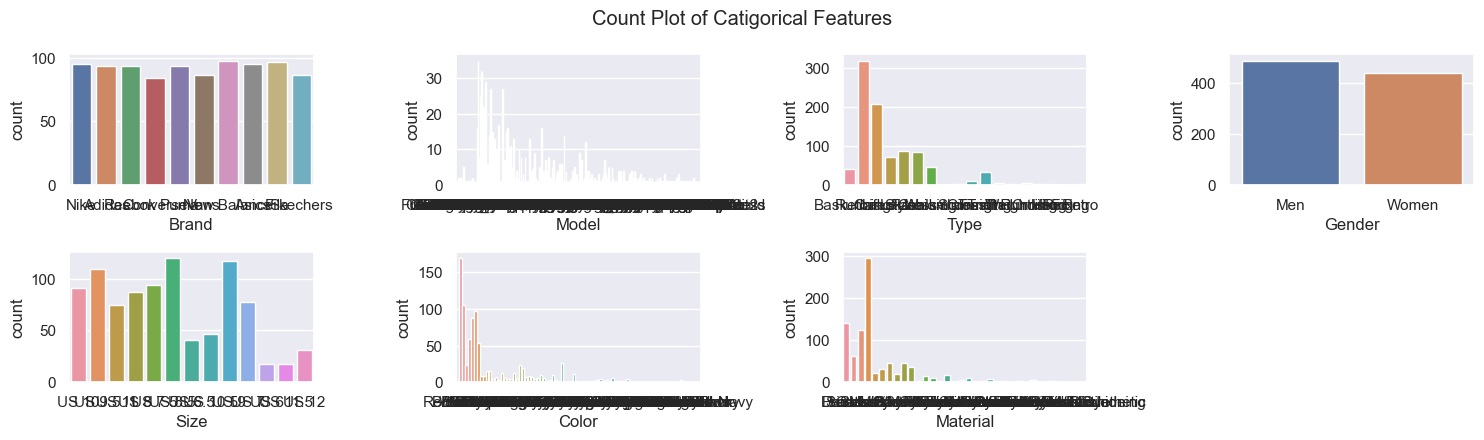

In [17]:
try:
    plt.suptitle("Count Plot of Catigorical Features")
    for i in range(0,len(catigorical_features)):
        plt.subplot(3,4,i+1)
        sns.countplot(x=data[catigorical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

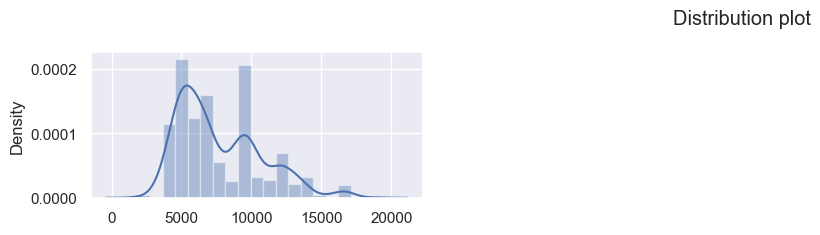

In [18]:
try:
    plt.suptitle("Distribution plot")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]])
        plt.tight_layout()
except Exception as e:
    print(e)

<Axes: title={'center': 'Brand Prices'}, xlabel='Price', ylabel='Brand'>

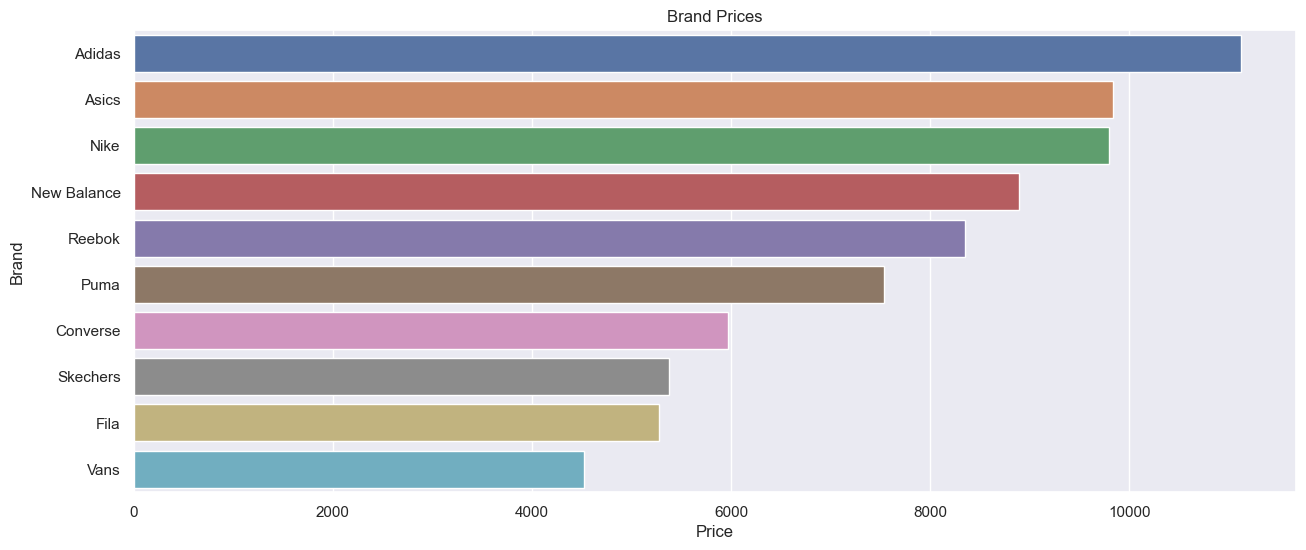

In [19]:
brand = data.groupby("Brand")["Price"].mean().sort_values(ascending=False).reset_index()
plt.title("Brand Prices")
sns.barplot(x="Price",y="Brand",data=brand)

<Axes: title={'center': 'Type Prices'}, xlabel='Type', ylabel='Price'>

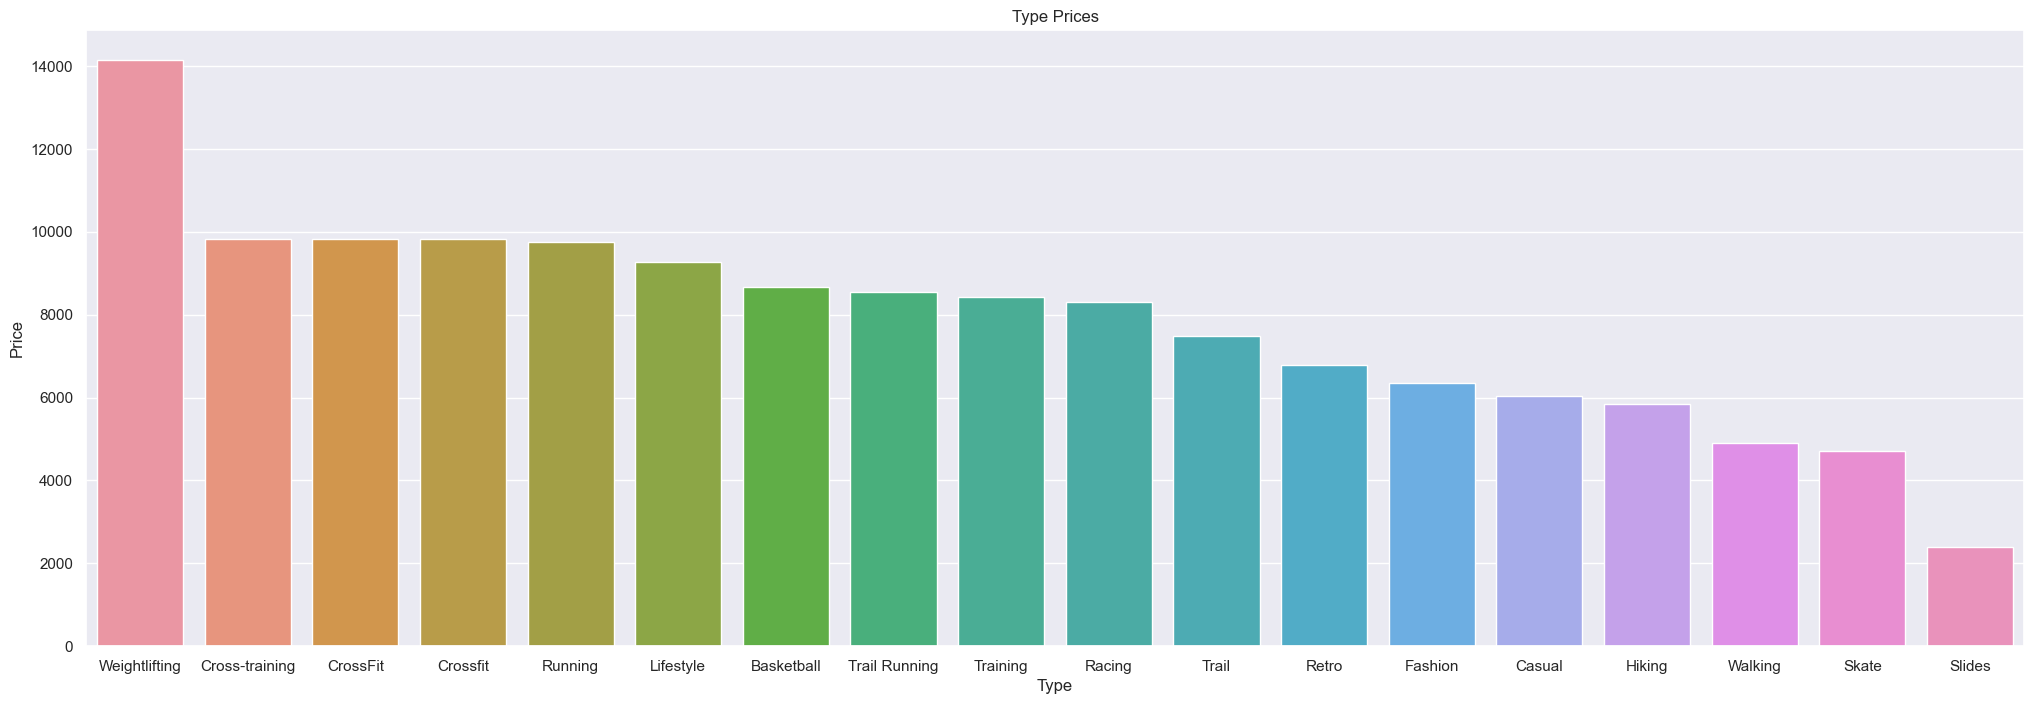

In [20]:
Price = data.groupby("Type")["Price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(25,8))
plt.title("Type Prices")
sns.barplot(x="Type",y="Price",data=Price)

<Axes: title={'center': 'Size vs Prices'}, xlabel='Size', ylabel='Price'>

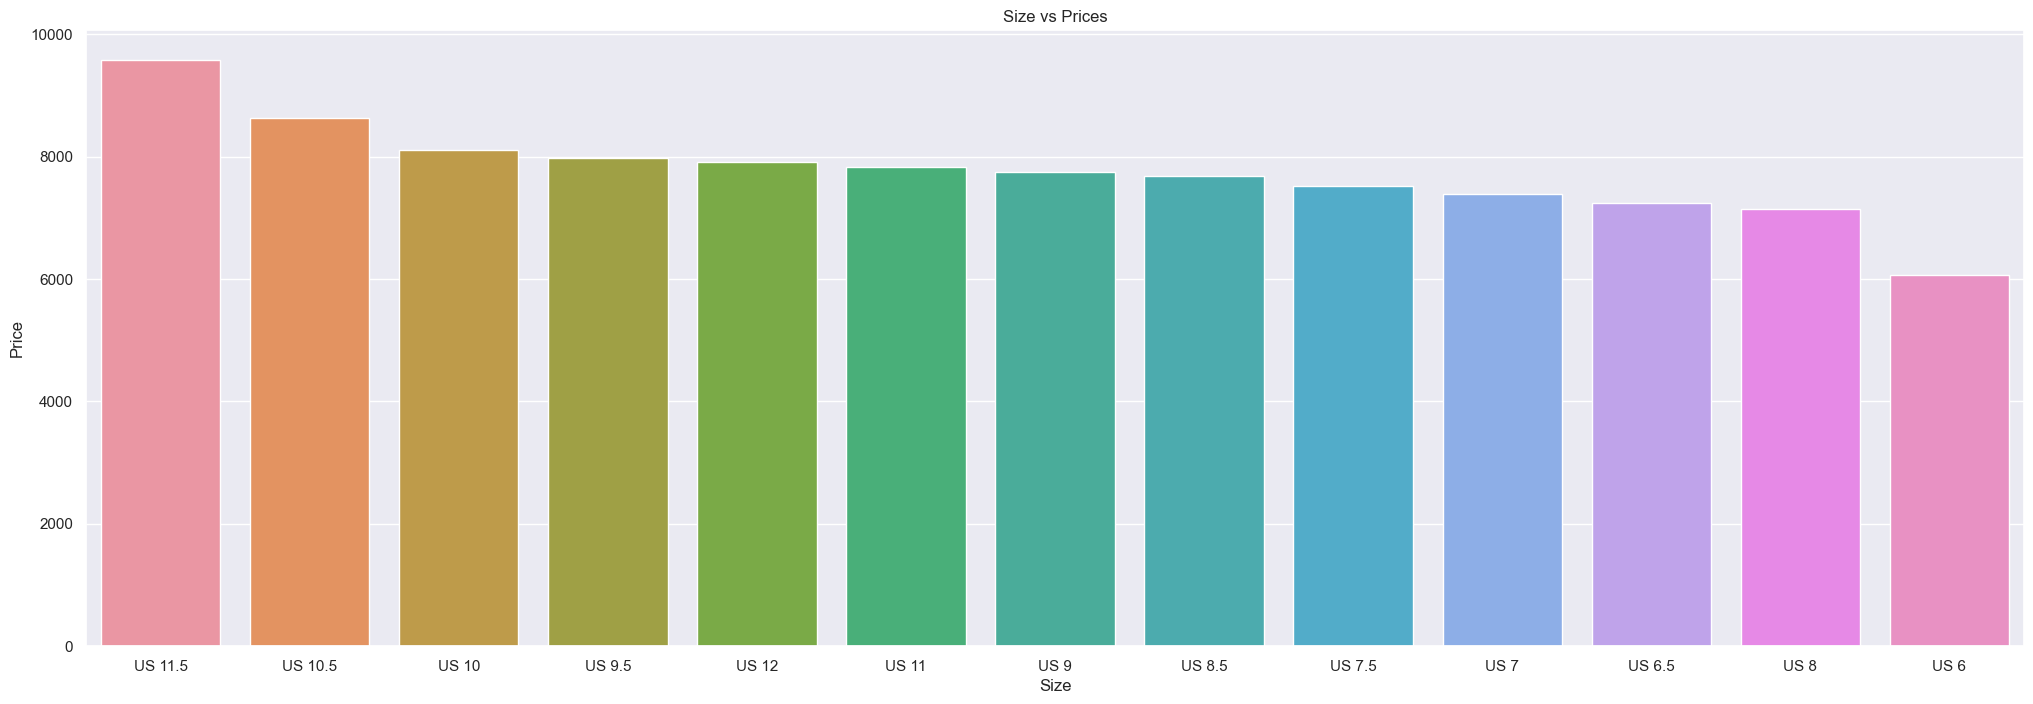

In [21]:
Size = data.groupby("Size")["Price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(25,8))
plt.title("Size vs Prices")
sns.barplot(x="Size",y="Price",data=Size)

<Axes: title={'center': 'Material vs Prices'}, xlabel='Price', ylabel='Material'>

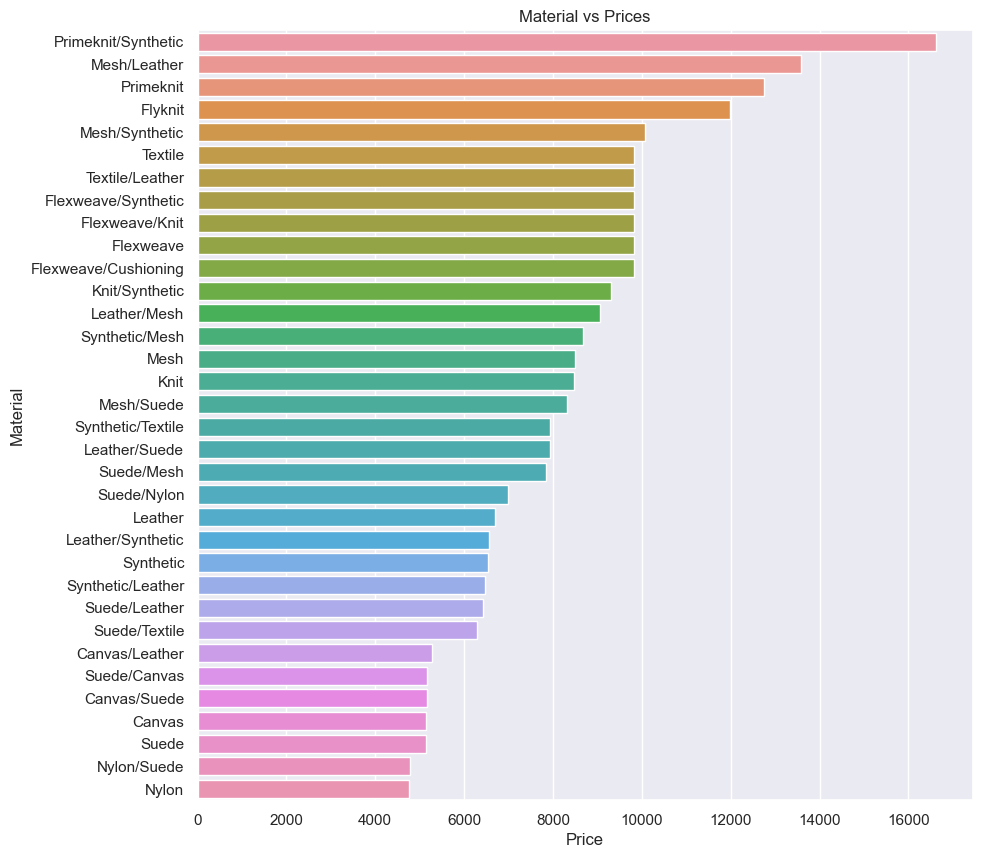

In [22]:
Material = data.groupby("Material")["Price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,10))
plt.title("Material vs Prices")
sns.barplot(x="Price",y="Material",data=Material)

In [23]:
data['Size'] = data['Size'].apply(lambda x:x.replace("US","")).astype(float)

In [24]:
cato =['Type', 'Gender']
# use label encoding on catigorical data to convert in to numerical
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()

for i in cato:
     data[i] = lable.fit_transform(data[i])

<Axes: >

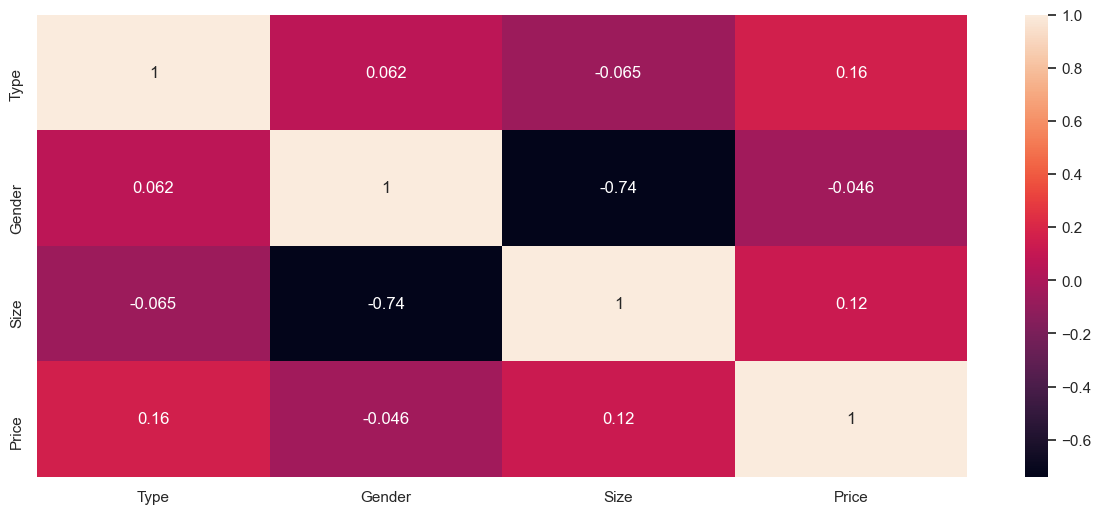

In [25]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [26]:
# Model Bulding
data

,Brand,Model,Type,Gender,Size,Color,Material,Price
0,Nike,Air Jordan 1,0,0,10.0,Red/Black,Leather,12835.0
1,Adidas,Ultra Boost 21,10,0,9.5,Black,Primeknit,13590.0
2,Reebok,Classic Leather,1,0,11.0,White,Leather,5662.5
3,Converse,Chuck Taylor,1,1,8.0,Navy,Canvas,4152.5
4,Puma,Future Rider,7,1,7.5,Pink,Mesh,6040.0
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,10,1,10.0,Grey,Mesh,9815.0
1002,Asics,Gel-Kayano Lite,10,0,9.5,Black,Mesh,12080.0
1003,Fila,Venom 94,5,1,7.5,White,Leather,5285.0
1004,Skechers,Summits,15,0,8.0,Grey,Mesh,4152.5


In [27]:
x =data.drop("Price",axis=1)
y = data["Price"]

In [28]:
# Saprate numerical and catiogerical data
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index(['Brand', 'Model', 'Color', 'Material'], dtype='object')
Index(['Type', 'Gender', 'Size'], dtype='object')


In [29]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [30]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("onehot",OneHotEncoder(handle_unknown="ignore",sparse=False)),
        ("scaler",StandardScaler(with_mean=False))
    ]
)

# Creat Preprocessor obj
preprocessing = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features),
    ("cato_pipline",cato_pipline,catigorical_features)
])

In [31]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(740, 7)
(740,)
(185, 7)
(185,)


In [33]:
# Transform 
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,IsolationForest
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [35]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [37]:
# Define models and their hyperparameters for GridSearchCV
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10]
        }
    },
    "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(),
        "params": {
            "alpha": [0.01, 0.1, 1, 10],
            "l1_ratio": [0.2, 0.4, 0.6, 0.8]
        }
    },
    "Decision Tree Regressor": {
        "model": DecisionTreeRegressor(),
        "params": {
            "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
            "splitter":['best','random'],
            "max_depth": [8,15,20],
            "min_samples_split": [2,3,4],
            "min_samples_leaf": [2,4],
            "max_features":["auto","sqrt","log2"]
        }
    },
    "RandomForestRegressor":{
        "model":RandomForestRegressor(),
        "params":{
            'n_estimators': [100, 200,250],
            "criterion": ["squared_error", "friedman_mse"],
            'max_depth': [8,15,20],
            'min_samples_split': [2,3,4],
            'min_samples_leaf': [2,4],
        }
    },
    "GradientBoostingRegressor":{
        "model":GradientBoostingRegressor(),
        "params":{
            'n_estimators': [100, 200,250],
            'learning_rate':[0.1,0.01,0.001],
            'loss':["squared_error", "absolute_error", "huber", "quantile"],
            "criterion": ["squared_error", "friedman_mse"]
        }
    },
    "XGBRegressor":{
        "model":XGBRegressor(),
        "params":{
            'n_estimators': [100, 200,250],
            'learning_rate':[0.1,0.01,0.001],
            'max_depth': [8,15,20],
        }
            
    },
    "KNeighborsRegressor":{
        "model":KNeighborsRegressor(),
        "params":{
            'n_neighbors': [5,6,8],
            'weights':["uniform", "distance"],
            'algorithm':["auto", "ball_tree", "kd_tree", "brute"],    
        }
        
    }
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Train and evaluate models using GridSearchCV
for model_name, model_params in models.items():
    model = model_params["model"]
    params = model_params["params"]
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    score = grid.score(X_train, y_train)
    y_pred = grid.predict(X_test)
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid.best_params_}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")
    print(f"R-squared: {r2_score(y_test, y_pred)}\n")
    
    r2_list.append(r2_score)
    y_predict_list.append(y_pred)
    trainig_score.append(score)

Model: Linear Regression
Best Parameters: {}
MAE: 5233329518649514.0
RMSE: 3.0148837918775584e+16
R-squared: -9.798853823617192e+25

Model: Lasso
Best Parameters: {'alpha': 0.1}
MAE: 424.7811766329448
RMSE: 843.0225784393114
R-squared: 0.9233852237156945

Model: Ridge
Best Parameters: {'alpha': 10}
MAE: 442.2001323857571
RMSE: 851.1233761203963
R-squared: 0.9219057313318495

Model: Elastic Net
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
MAE: 449.6291816263872
RMSE: 853.3352043511109
R-squared: 0.9214993142305763

Model: Decision Tree Regressor
Best Parameters: {'criterion': 'poisson', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
MAE: 629.030725244179
RMSE: 1158.7783557380121
R-squared: 0.8552445664877427

Model: RandomForestRegressor
Best Parameters: {'criterion': 'squared_error', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 100}
MAE: 639.9411014247654
RMSE: 1011.4620960422637
R-squ

In [38]:
trainig_score

[0.9881180171542066,
 0.9895283850722122,
 0.9889422953225707,
 0.9886544899676108,
 0.9291405262915361,
 0.9456482281741625,
 0.9510719952522644,
 0.9875590348691073,
 0.9985647499373721]

Text(0, 0.5, 'Predictions')

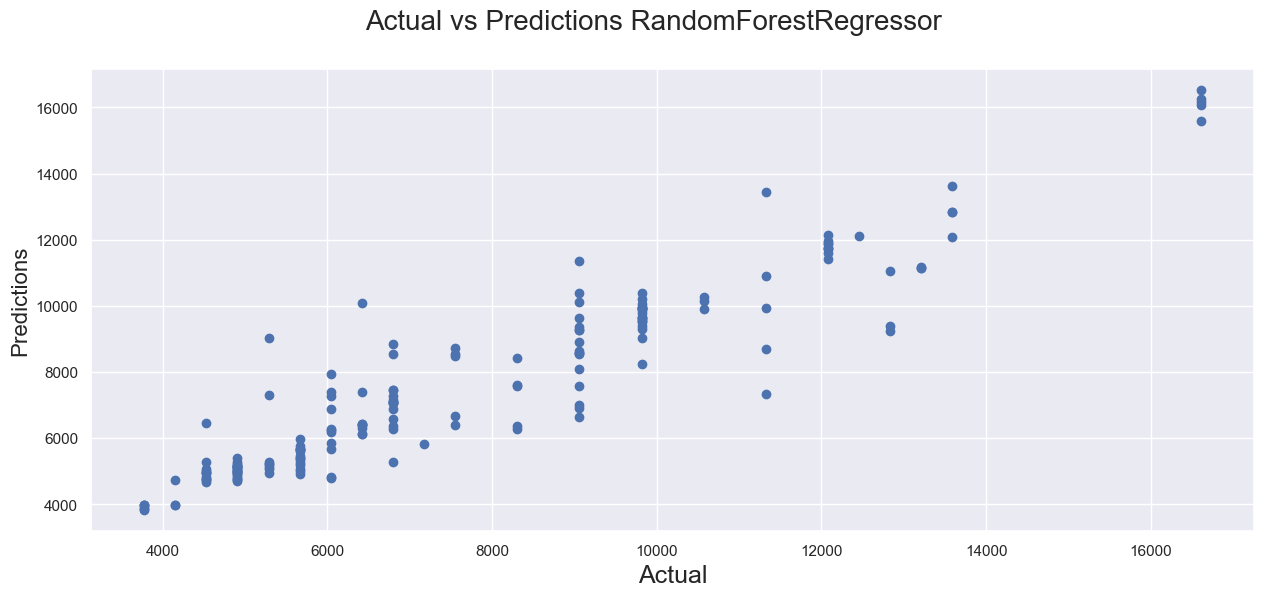

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[5])
fig.suptitle('Actual vs Predictions RandomForestRegressor', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [40]:
data

,Brand,Model,Type,Gender,Size,Color,Material,Price
0,Nike,Air Jordan 1,0,0,10.0,Red/Black,Leather,12835.0
1,Adidas,Ultra Boost 21,10,0,9.5,Black,Primeknit,13590.0
2,Reebok,Classic Leather,1,0,11.0,White,Leather,5662.5
3,Converse,Chuck Taylor,1,1,8.0,Navy,Canvas,4152.5
4,Puma,Future Rider,7,1,7.5,Pink,Mesh,6040.0
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,10,1,10.0,Grey,Mesh,9815.0
1002,Asics,Gel-Kayano Lite,10,0,9.5,Black,Mesh,12080.0
1003,Fila,Venom 94,5,1,7.5,White,Leather,5285.0
1004,Skechers,Summits,15,0,8.0,Grey,Mesh,4152.5


In [41]:
data.to_csv("Clean Shoe Data.csv",index=False)